In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = r"C:\Users\Faizan\OneDrive - BENNETT UNIVERSITY\blood disease\cardio_train.csv\cardio_train.csv"
df = pd.read_csv(file_path, sep=';')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  



Dataset Shape: (70000, 13)

Summary Statistics:
                 id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
st

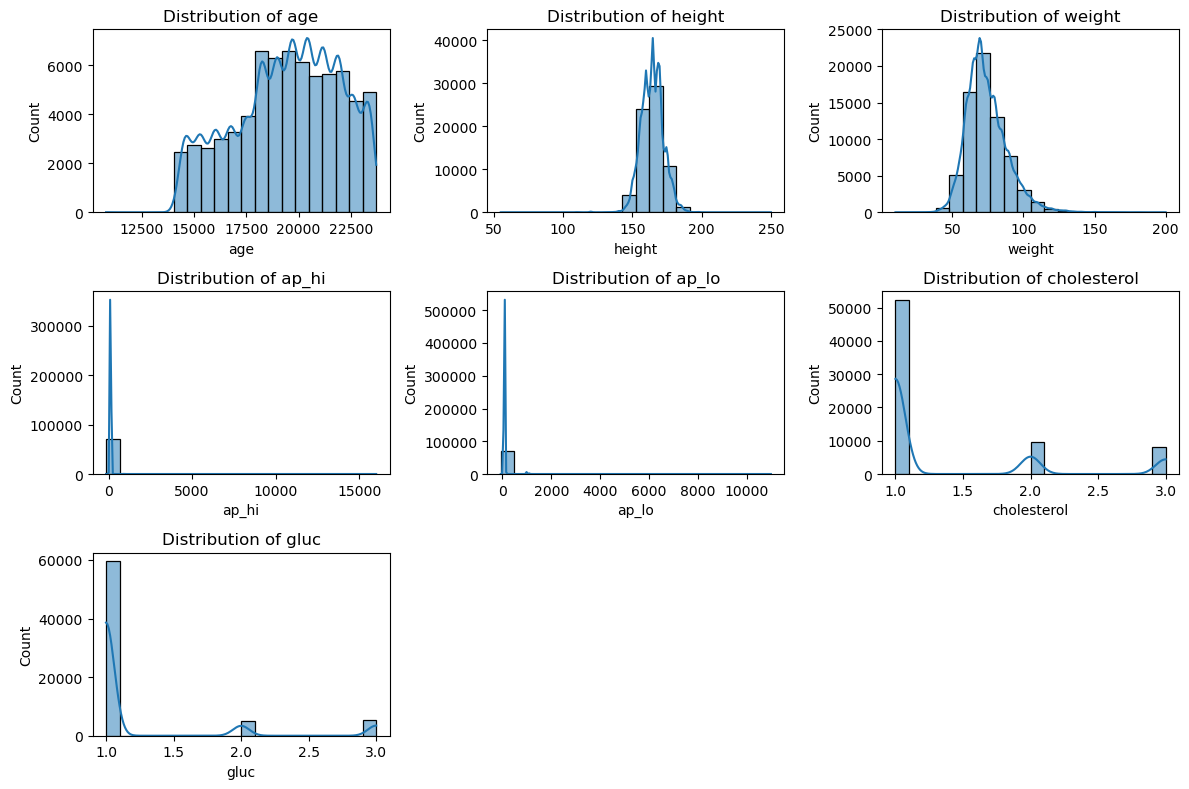

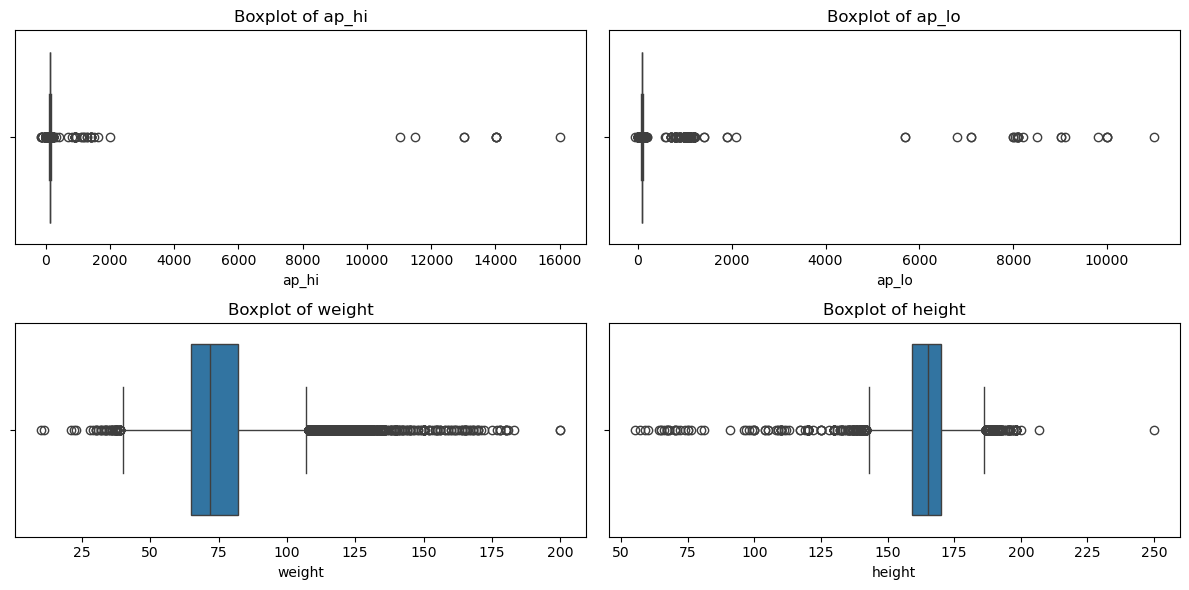

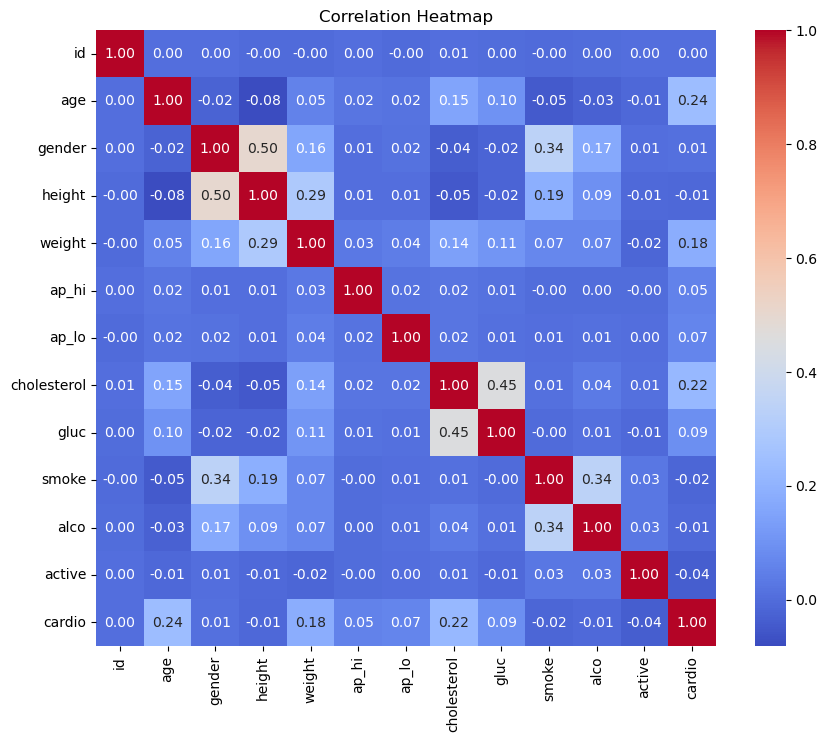

In [7]:
# 2. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

print("\nDataset Shape:", df.shape)

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(12, 8))
for i, col in enumerate(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, col in enumerate(['ap_hi', 'ap_lo', 'weight', 'height'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
EDA Inferences (Cardio Dataset)
1. Dataset Overview:

Shape: (70,000, 13) → Large dataset, suitable for robust modeling.
Features: 11 predictors + target (cardio), excluding ID.

2. Summary Statistics:

Age: 30-65 years (Mean ~53.3) → Middle-aged majority.
Gender: ~65% female (if 1 = female).
Height & Weight: Normal range, but outliers (e.g., 55 cm, 10 kg).
BP (ap_hi, ap_lo): Mean ~128/96 mmHg, but extreme outliers (e.g., -150, 16,020).
Cholesterol & Glucose: Mostly normal, skewed toward 1 (normal).
Lifestyle: Low smoking (8.8%), alcohol (5.4%), high physical activity (80.4%).
Target (cardio): Balanced (50% disease, 50% no disease).

3. Data Quality:

No Missing Values.
Outliers in BP, height, and weight require cleaning.

4. Expected Plot Insights:

Histograms: Bell curve for age, normal for height/weight, skew in BP.
Box Plots: BP, height, and weight show extreme outliers.
Correlation: Age, BP, cholesterol, and glucose likely correlate with cardio.

In [8]:
# 3. Data Cleaning
df = df.dropna()  
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_clean

df = remove_outliers(df, 'ap_hi')
df = remove_outliers(df, 'ap_lo')

df = df[(df['ap_hi'] > 0) & (df['ap_lo'] > 0) & (df['height'] > 0) & (df['weight'] > 0)]

df['age_years'] = df['age'] // 365

print("\nAfter Cleaning - Shape:", df.shape)
print(df.describe())


After Cleaning - Shape: (64502, 14)
                 id           age        gender        height        weight  \
count  64502.000000  64502.000000  64502.000000  64502.000000  64502.000000   
mean   49966.522418  19491.930033      1.351896    164.457381     74.261698   
std    28855.797580   2458.792155      0.477565      8.148252     14.142242   
min        0.000000  10859.000000      1.000000     55.000000     11.000000   
25%    24924.250000  17720.000000      1.000000    159.000000     65.000000   
50%    50009.500000  19716.000000      1.000000    165.000000     72.000000   
75%    74878.750000  21343.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  64502.000000  64502.000000  64502.000000  64502.000000  64502.000000   
mean     126.623469     81.789433      1.364252      1.225652      0.087625   
std       14.3

In [9]:
# 4. Feature Engineering (Initial)
df['bmi'] = df['weight'] / ((df['height'] / 100) ** 2)

bins = [0, 30, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
df['age_group'] = pd.cut(df['age_years'], bins=bins, labels=labels, right=False)

print("\nNew Features Added:")
print(df[['bmi', 'age_group']].head())


New Features Added:
         bmi age_group
0  21.967120    Senior
1  34.927679    Senior
2  23.507805    Senior
3  28.710479    Senior
5  29.384676   Elderly


In [10]:
# 5. Deliverable

output_path = r"C:\Users\Faizan\OneDrive - BENNETT UNIVERSITY\blood disease\cardio_train.csv\cleaned_cardio_data.csv"
df.to_csv(output_path, index=False)
print("\nCleaned dataset saved as:", output_path)

print("\nEDA Insights:")
print("- Age ranges from", df['age_years'].min(), "to", df['age_years'].max(), "years.")
print("- Average BMI:", round(df['bmi'].mean(), 2))
print("- Correlation between ap_hi and cardio:", round(df['ap_hi'].corr(df['cardio']), 2))


Cleaned dataset saved as: C:\Users\Faizan\OneDrive - BENNETT UNIVERSITY\blood disease\cardio_train.csv\cleaned_cardio_data.csv

EDA Insights:
- Age ranges from 29 to 64 years.
- Average BMI: 27.54
- Correlation between ap_hi and cardio: 0.43


In [ ]:
Final Thoughts on Week 1
Achievements:
Loaded and explored a 70,000-row dataset.
Cleaned it to 64,502 rows by removing unrealistic blood pressure values and outliers.
Added age_years, bmi, and age_group for better analysis.
Confirmed no missing values and a balanced target (cardio ≈ 50/50).
Identified key patterns: older population, overweight average BMI, and a notable ap_hi-cardio link.
Areas for Refinement (Optional):
height and weight still have extremes (e.g., 55 cm, 200 kg). We could add stricter filters (e.g., height 100-200 cm, weight 30-150 kg) if these skew later results.
More insights could be added (e.g., correlation of bmi or cholesterol with cardio) if you want a deeper summary.